In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [2]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Segun el df_train.info() en todas las columnas hay valores faltantes a excepcion de la de Id.

In [4]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


La mayoría de los pasajeros eran jóvenes.
Medianas: Todas son 0, lo que indica que más del 50% de las personas no usaron estos servicios.
Desviaciones estándar y valores máximos muy altos, lo que sugiere que pocas personas gastaron mucho y la mayoría gastó poco o nada.
Unos pocos pasajeros gastaron muchísimo, elevando los promedios y la desviación estándar.

In [5]:
df_train.describe(include=["O"]).T

,count,unique,top,freq
PassengerId,8693,8693,0001_01,1
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Cabin,8494,6560,G/734/S,8
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Name,8493,8473,Gollux Reedall,2


La mayoría de los pasajeros vienen de Earth y van a TRAPPIST-1e.
Muy pocos son VIP.
Más de la mitad no estaban en criosueño.
Aunque hay muchos cabinas, algunas se repiten (compartidas o errores).

In [6]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

<Axes: title={'center': 'Distribución de Transported'}, xlabel='Transported'>

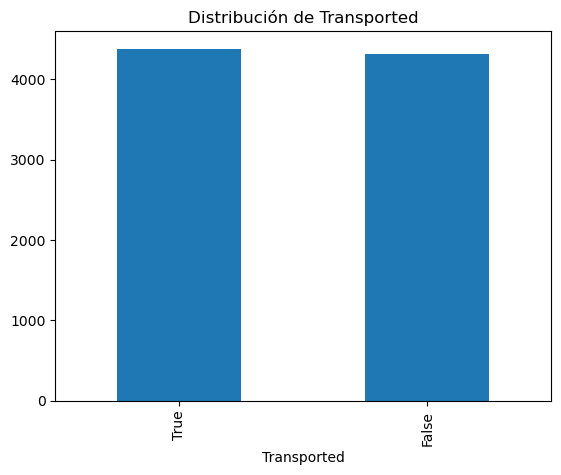

In [7]:
df_train['Transported'].value_counts().plot(kind='bar', title='Distribución de Transported')

In [8]:
df_train.groupby("Transported").size().sort_values(ascending=False)

Transported
True     4378
False    4315
dtype: int64

Habian mas personas que fueron transportadas vs las no transportadas

<Axes: title={'center': 'Pasajeros por HomePlanet'}, xlabel='HomePlanet'>

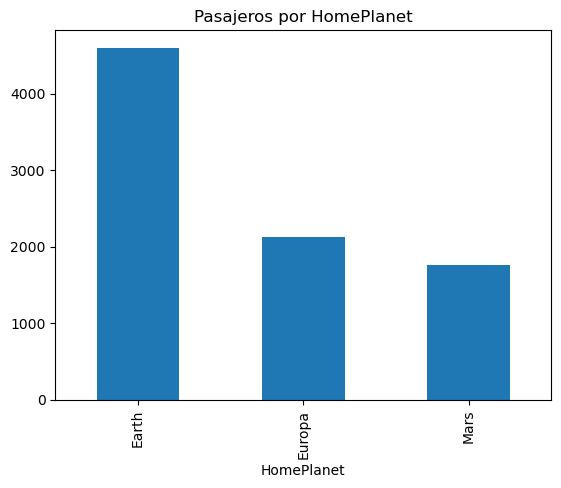

In [9]:
df_train['HomePlanet'].value_counts().plot(kind='bar', title='Pasajeros por HomePlanet')

El planeta de origen con mas pasajeros a bordo era la tierra

<Axes: title={'center': 'Pasajeros por Destination'}, xlabel='Destination'>

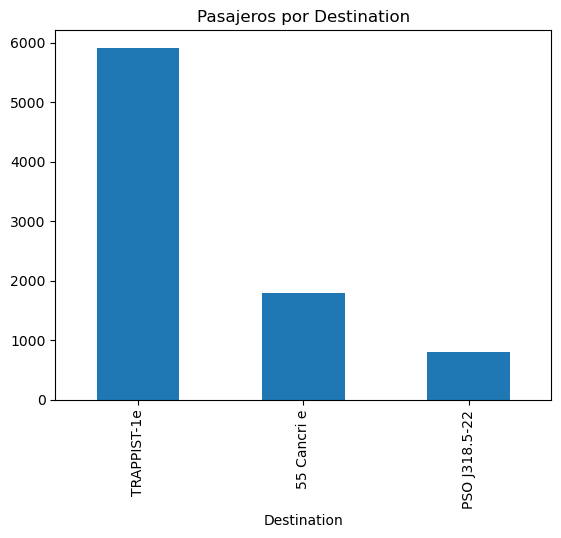

In [10]:
df_train['Destination'].value_counts().plot(kind='bar', title='Pasajeros por Destination')

In [11]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
# Columnas numéricas
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
medians = {}

for col in num_cols:
    med = df_train[col].median()
    medians[col] = med
    df_train[col].fillna(med, inplace=True)
    df_test[col].fillna(med, inplace=True)

# Columnas categóricas
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP','Cabin']
modes = {}

for col in cat_cols:
    mod = df_train[col].mode()[0]
    modes[col] = mod
    df_train[col].fillna(mod, inplace=True)
    df_test[col].fillna(mod, inplace=True)

# Mostramos las estadísticas aplicadas
print("\nMedianas aplicadas:")
for k, v in medians.items():
    print(f"{k}: {v}")

print("\nModas aplicadas:")
for k, v in modes.items():
    print(f"{k}: {v}")



Medianas aplicadas:
Age: 27.0
RoomService: 0.0
FoodCourt: 0.0
ShoppingMall: 0.0
Spa: 0.0
VRDeck: 0.0

Modas aplicadas:
HomePlanet: Earth
CryoSleep: False
Destination: TRAPPIST-1e
VIP: False
Cabin: G/734/S


C:\Users\S94\AppData\Local\Temp\ipykernel_18768\1111156115.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(med, inplace=True)
C:\Users\S94\AppData\Local\Temp\ipykernel_18768\1111156115.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

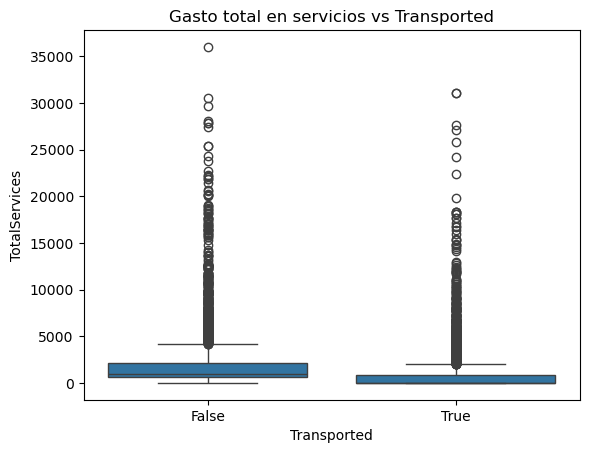

In [13]:
df_train['TotalServices'] = df_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

sns.boxplot(data=df_train, x='Transported', y='TotalServices')
plt.title('Gasto total en servicios vs Transported')
df_test['TotalServices'] = df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

<Axes: title={'center': 'Distribución de edades'}, ylabel='Frequency'>

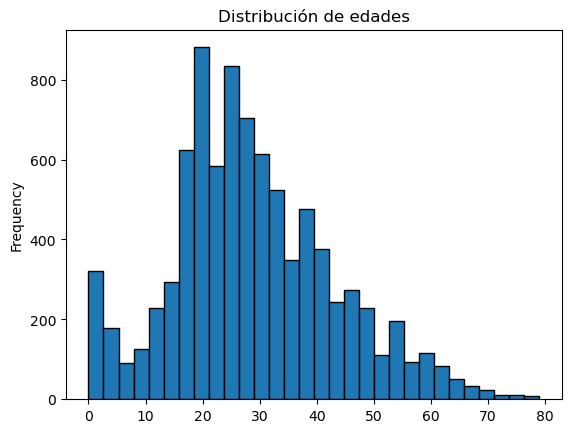

In [14]:
df_train['Age'].plot(kind='hist', bins=30, title='Distribución de edades', edgecolor='black')

<Axes: title={'center': 'CryoSleep vs Transported'}, xlabel='CryoSleep'>

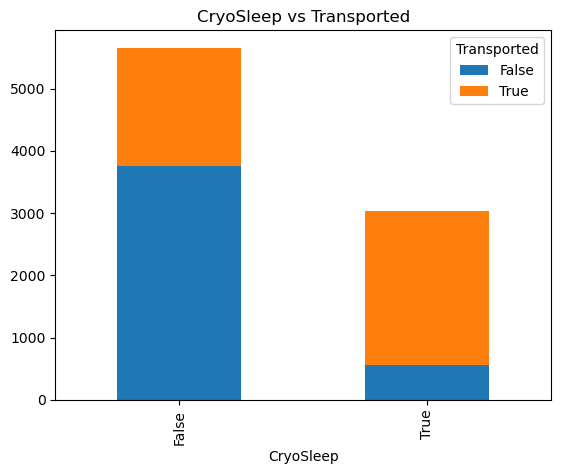

In [15]:
#Revisando si estar en criosueño influyo en ser transportado
pd.crosstab(df_train['CryoSleep'], df_train['Transported']).plot(kind='bar', stacked=True, title='CryoSleep vs Transported')

<Axes: title={'center': 'VIP vs Transported'}, xlabel='VIP'>

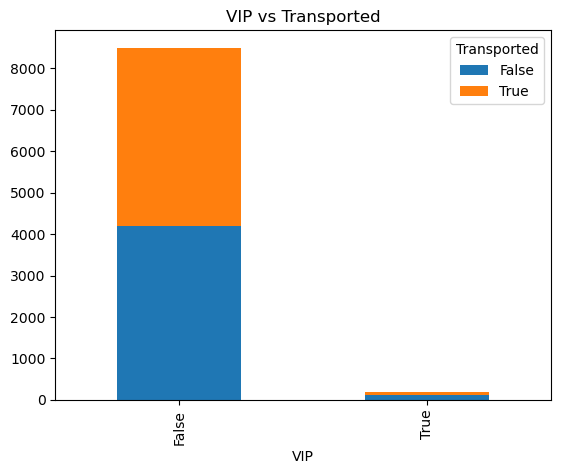

In [16]:
#Revisando si las personas vip fueron mas o menos transportadas
pd.crosstab(df_train['VIP'], df_train['Transported']).plot(kind='bar', stacked=True, title='VIP vs Transported')

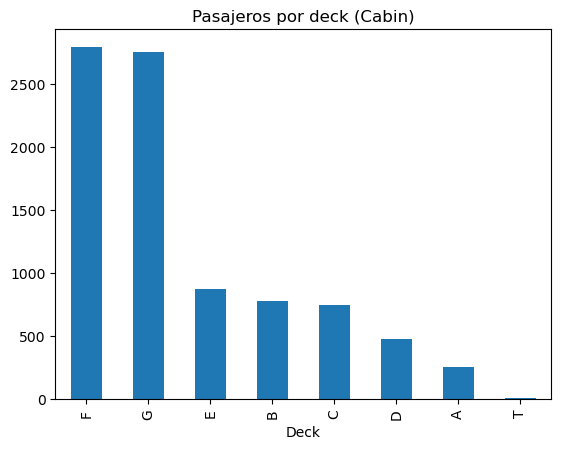

In [17]:
df_train['Deck'] = df_train['Cabin'].str[0]
df_train['Deck'].value_counts().plot(kind='bar', title='Pasajeros por deck (Cabin)')
df_test['Deck'] = df_test['Cabin'].str[0]

In [18]:
df_train.isnull().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             200
Transported        0
TotalServices      0
Deck               0
dtype: int64

In [19]:
df_train.isnull().mean().sort_values(ascending=False)*100

Name             2.300702
PassengerId      0.000000
HomePlanet       0.000000
CryoSleep        0.000000
Cabin            0.000000
Destination      0.000000
Age              0.000000
VIP              0.000000
RoomService      0.000000
FoodCourt        0.000000
ShoppingMall     0.000000
Spa              0.000000
VRDeck           0.000000
Transported      0.000000
TotalServices    0.000000
Deck             0.000000
dtype: float64

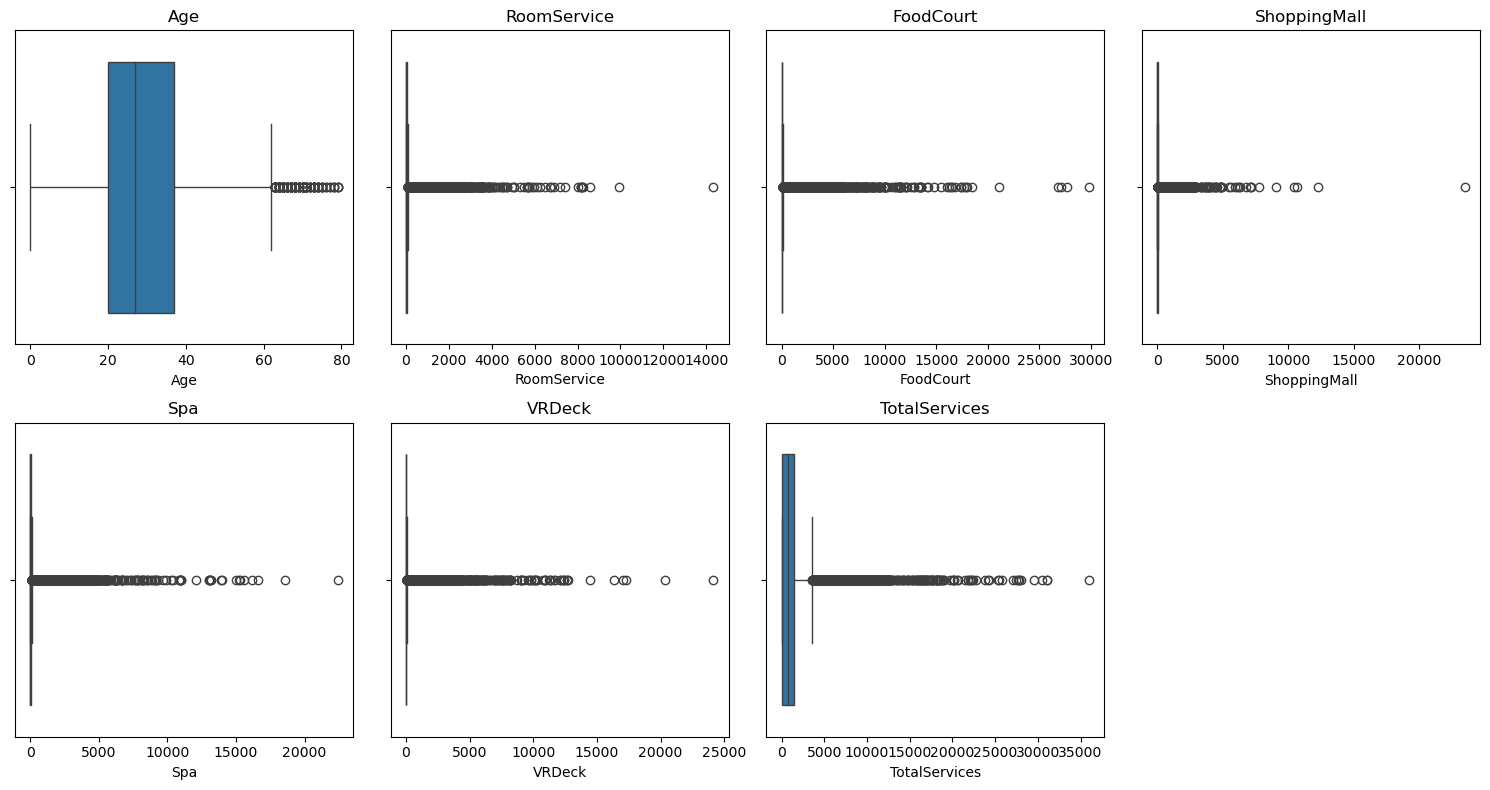

In [20]:
#REVISANDO OUTLIERS
numerical_cols = df_train.select_dtypes(include=["float64", "int64"]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ["PassengerId"]]  # target queda fuera

import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar tamaño general
plt.figure(figsize=(15, 8))

# Un boxplot por cada columna numérica
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.boxplot(x=df_train[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    8693 non-null   object 
 1   HomePlanet     8693 non-null   object 
 2   CryoSleep      8693 non-null   bool   
 3   Cabin          8693 non-null   object 
 4   Destination    8693 non-null   object 
 5   Age            8693 non-null   float64
 6   VIP            8693 non-null   bool   
 7   RoomService    8693 non-null   float64
 8   FoodCourt      8693 non-null   float64
 9   ShoppingMall   8693 non-null   float64
 10  Spa            8693 non-null   float64
 11  VRDeck         8693 non-null   float64
 12  Name           8493 non-null   object 
 13  Transported    8693 non-null   bool   
 14  TotalServices  8693 non-null   float64
 15  Deck           8693 non-null   object 
dtypes: bool(3), float64(7), object(6)
memory usage: 908.5+ KB


In [22]:
def winsorize_iqr(df_train, df_test, columns, force_non_negative=True):
    limits = {}  # Guardar límites por columna

    for col in columns:
        Q1 = df_train[col].quantile(0.25)
        Q3 = df_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Forzar límite inferior a 0 si la columna debe ser no negativa
        if force_non_negative:
            lower = max(0, lower)

        limits[col] = (lower, upper)

        # Aplicar winsorizing al df_train
        df_train[col] = np.where(df_train[col] < lower, lower,
                          np.where(df_train[col] > upper, upper, df_train[col]))

        # Aplicar winsorizing al df_test con los mismos límites
        df_test[col] = np.where(df_test[col] < lower, lower,
                         np.where(df_test[col] > upper, upper, df_test[col]))
        
    return limits


In [23]:
#Seleccion de las columnas numéricas donde aplicar el winsorizing
cols_to_winsorize = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalServices']

iqr_limits = winsorize_iqr(df_train, df_test, cols_to_winsorize)


In [24]:
#Ver los limites aplicados
for col, (low, high) in iqr_limits.items():
    print(f"{col}: [{low:.2f}, {high:.2f}]")


Age: [0.00, 62.50]
RoomService: [0.00, 102.50]
FoodCourt: [0.00, 152.50]
ShoppingMall: [0.00, 55.00]
Spa: [0.00, 132.50]
VRDeck: [0.00, 100.00]
TotalServices: [0.00, 3602.50]


In [25]:
# Convertir booleanos a 0 y 1
df_train['CryoSleep'] = df_train['CryoSleep'].astype(int)
df_test['CryoSleep'] = df_test['CryoSleep'].astype(int)
df_train['VIP'] = df_train['VIP'].astype(int)
df_test['VIP'] = df_test['VIP'].astype(int)

# One-hot encoding de categóricas (HomePlanet, Destination, Deck)
categorical_cols = ['HomePlanet', 'Destination', 'Deck']
df_train = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)
df_test = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)

# Alinear columnas del test al train (importante si alguna categoría no aparece en test)
df_test = df_test.reindex(columns=df_train.columns.drop('Transported'), fill_value=0)


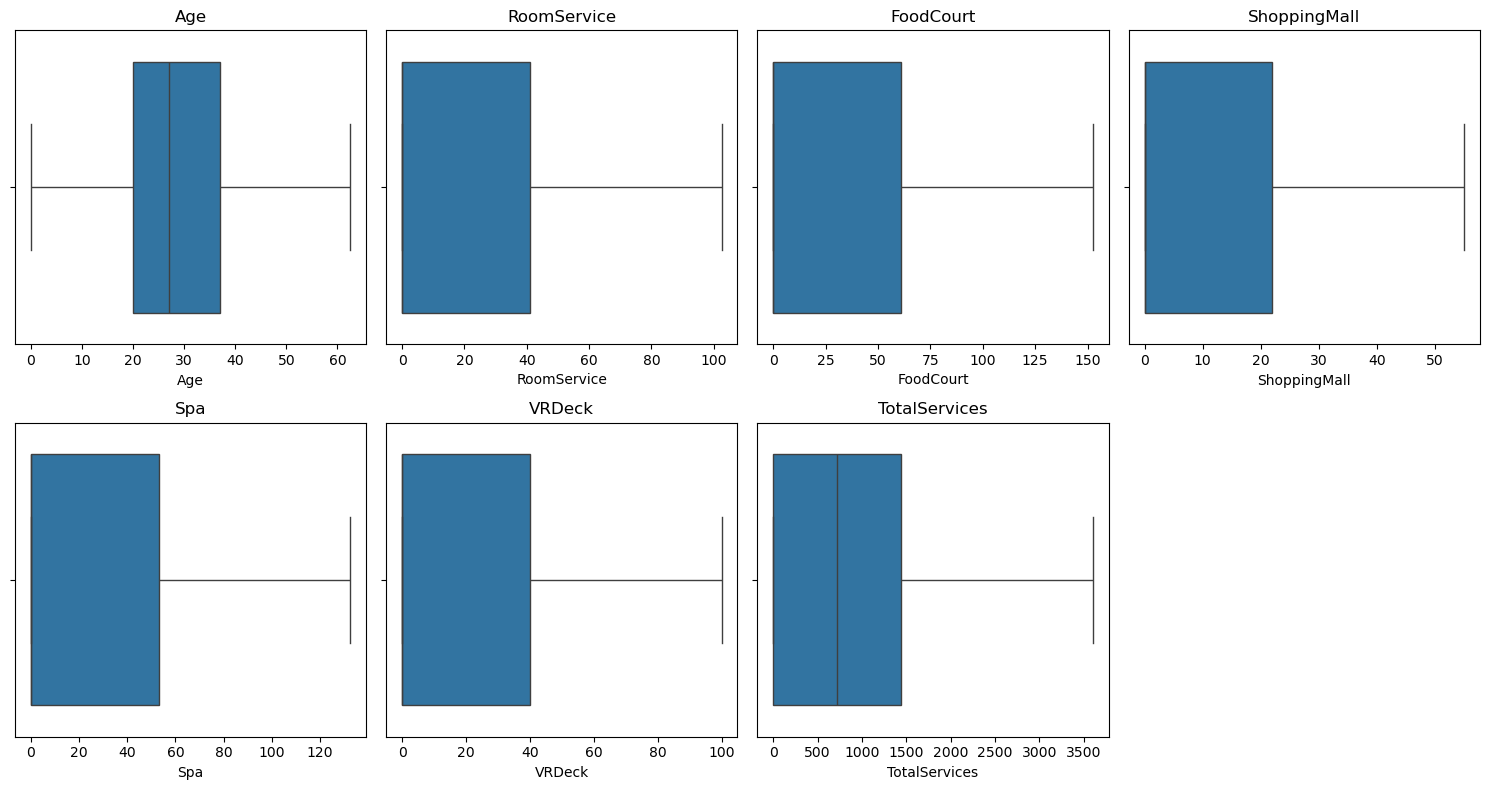

In [26]:
numerical_cols = df_train.select_dtypes(include=["float64", "int64"]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ["PassengerId"]]  # target queda fuera

import matplotlib.pyplot as plt
import seaborn as sns

# Ajustar tamaño general
plt.figure(figsize=(15, 8))

# Un boxplot por cada columna numérica
for i, col in enumerate(numerical_cols):
    plt.subplot(2, (len(numerical_cols) + 1) // 2, i + 1)
    sns.boxplot(x=df_train[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [27]:
#Dado que en kaggle la columna transported viene excluida de los conjuntos de prueba, solo convierto a numerica la columna en el conjunto de entrenamiento
df_train['Transported'] = df_train['Transported'].astype(int)


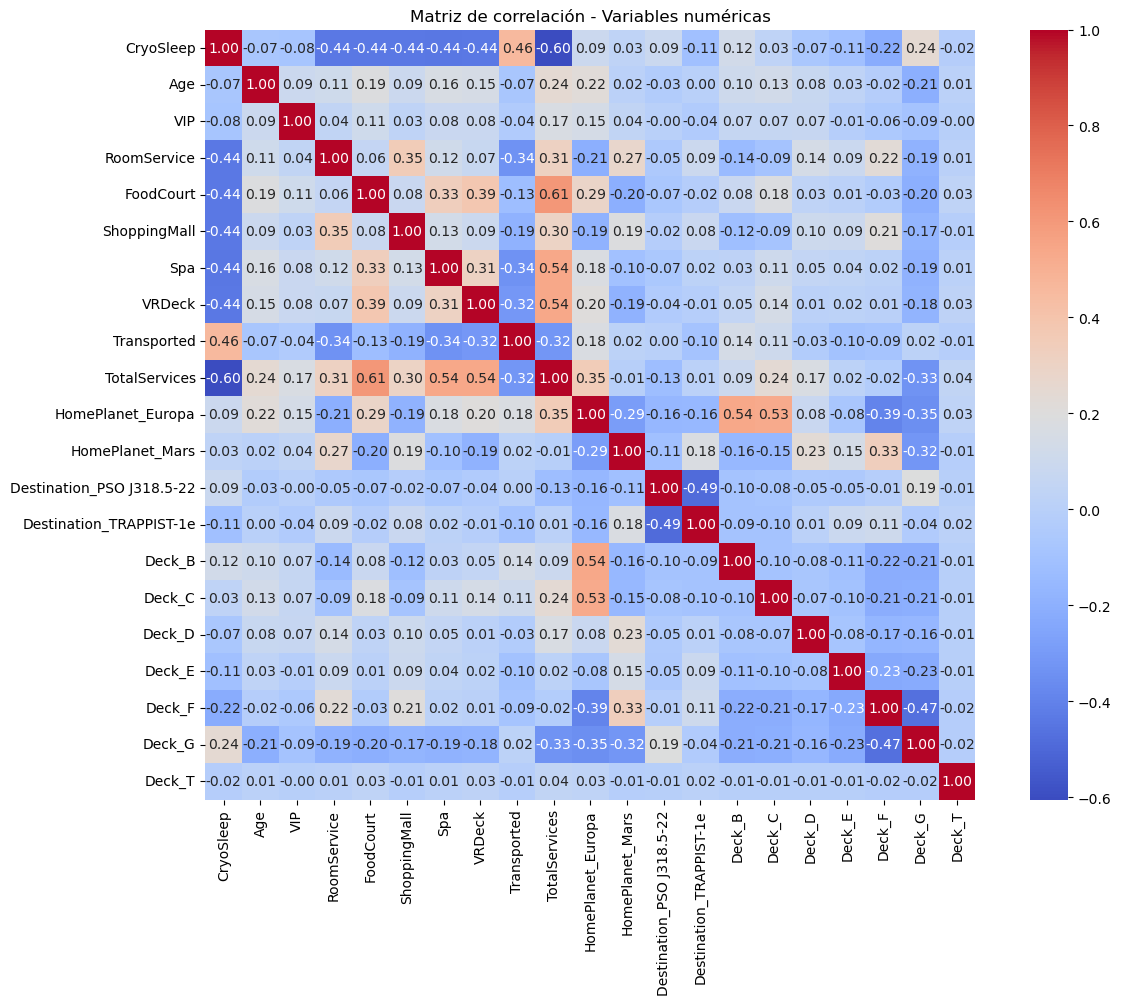

In [28]:
# Calcular matriz de correlación solo con variables numéricas
corr_matrix = df_train.corr(numeric_only=True)

# Crear el heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de correlación - Variables numéricas")
plt.show()


In [29]:
df_train.drop(columns=['Cabin', 'Name'], inplace=True, errors='ignore')
df_test.drop(columns=['Cabin', 'Name'], inplace=True, errors='ignore')

In [30]:
!pip install lightgbm
!pip install xgboost


--- Decision Tree ---
Accuracy: 0.7199539965497412
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       863
           1       0.71      0.75      0.73       876

    accuracy                           0.72      1739
   macro avg       0.72      0.72      0.72      1739
weighted avg       0.72      0.72      0.72      1739



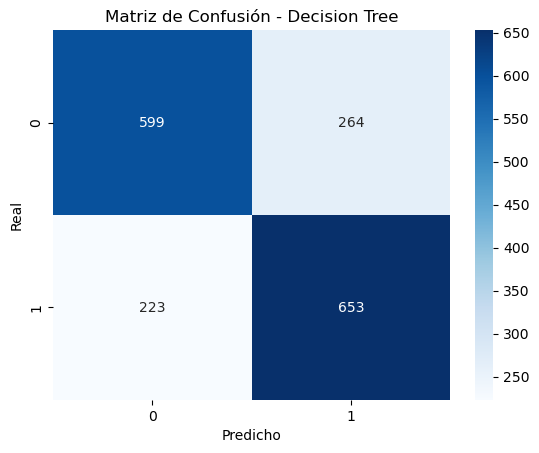

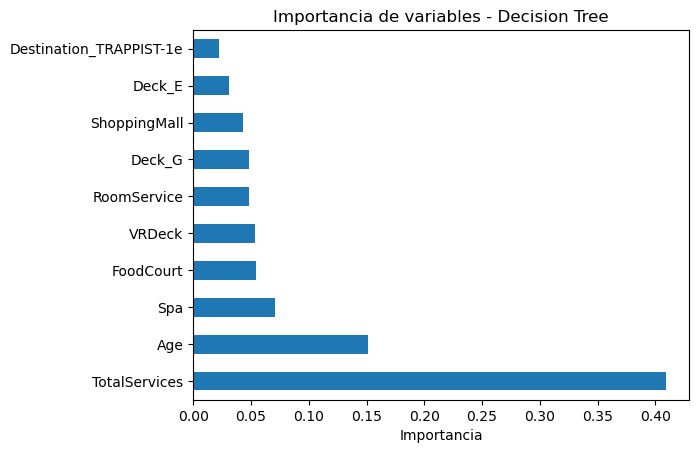


--- Random Forest ---
Accuracy: 0.7596319723979299
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       863
           1       0.78      0.73      0.75       876

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



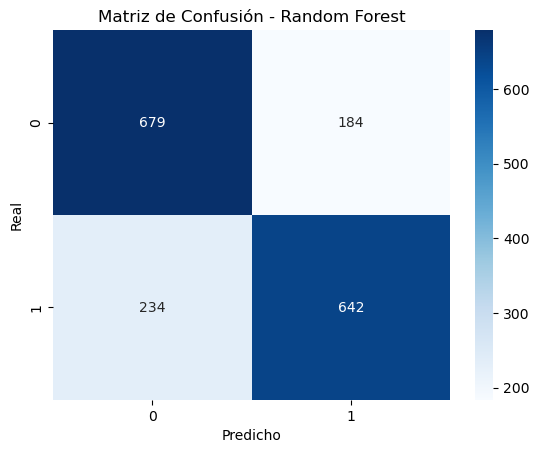

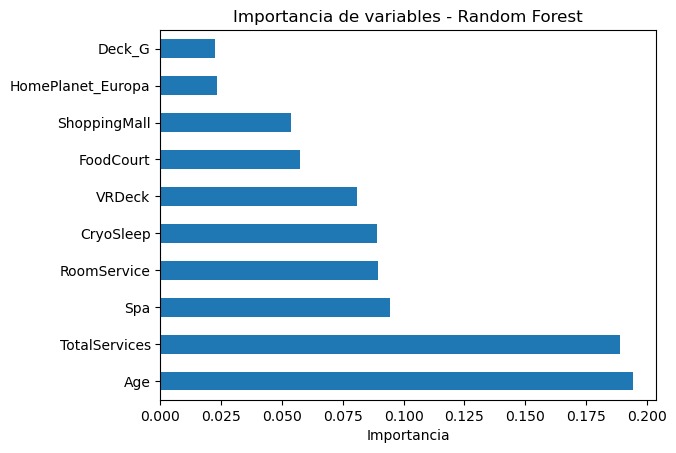


--- LightGBM ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 791
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
Accuracy: 0.780333525014376
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       863
           1       0.78      0.78      0.78       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78    

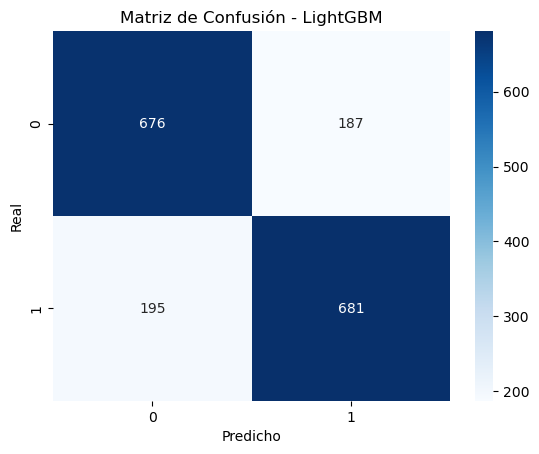

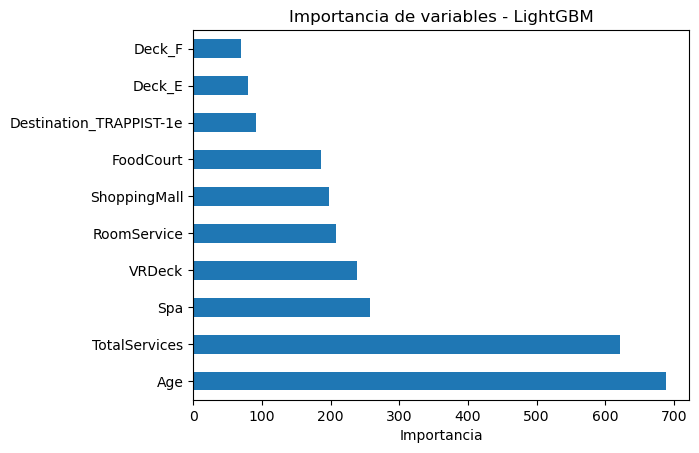


--- SVM ---
Accuracy: 0.7866589994249569
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       863
           1       0.79      0.78      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



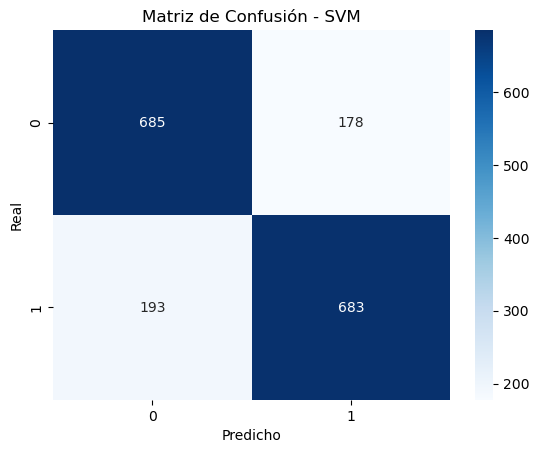


--- XGBoost ---
Accuracy: 0.7705577918343876
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       863
           1       0.77      0.77      0.77       876

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



C:\Users\S94\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:49:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


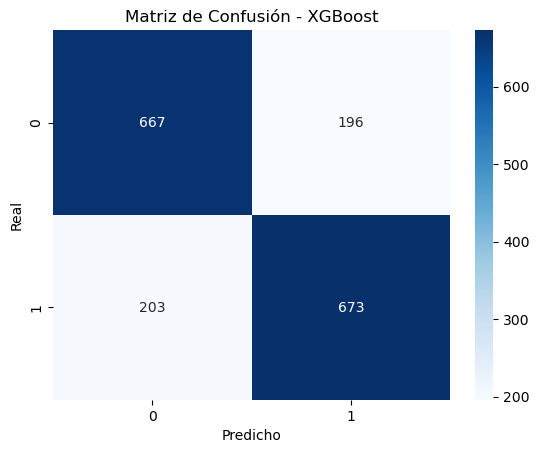

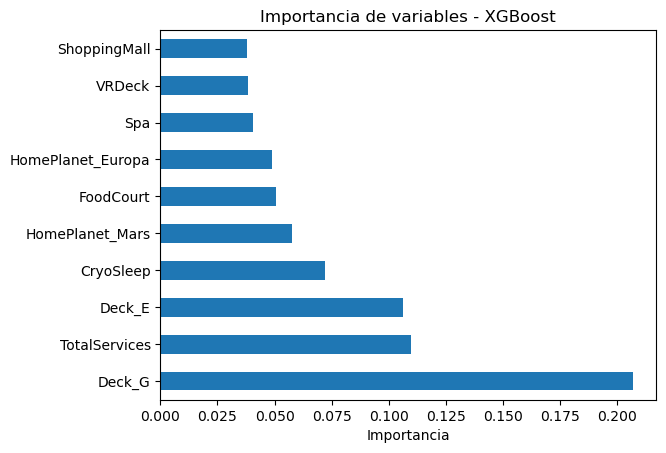


📊 Comparación de Accuracy entre modelos:
          Modelo  Accuracy
3            SVM  0.786659
2       LightGBM  0.780334
4        XGBoost  0.770558
1  Random Forest  0.759632
0  Decision Tree  0.719954


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Separar features y target
X = df_train.drop(columns=['Transported', 'PassengerId'])
y = df_train['Transported']

# 2. Dividir en train/test
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Inicializar modelos
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(probability=True, random_state=42))
    ]),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 4. Evaluar modelos y guardar resultados
results = []

for name, model in models.items():
    print(f"\n--- {name} ---")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    print("Accuracy:", acc)
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()

    # Importancia de variables (si aplica)
    if hasattr(model, "feature_importances_"):
        importances = pd.Series(model.feature_importances_, index=X.columns)
        importances.nlargest(10).plot(kind='barh')
        plt.title(f'Importancia de variables - {name}')
        plt.xlabel('Importancia')
        plt.show()

    # Guardar resultado
    results.append({'Modelo': name, 'Accuracy': acc})

# 5. Mostrar tabla comparativa de accuracy
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("\n📊 Comparación de Accuracy entre modelos:")
print(results_df)


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
import pandas as pd

# 1. Separar features y target
X = df_train.drop(columns=['Transported', 'PassengerId'])
y = df_train['Transported']

# 2. Dividir en entrenamiento y validación para evaluar
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Inicializar modelos (los tres con mejor accuracy)
lgbm = lgb.LGBMClassifier(random_state=42)
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42))
])

# 4. Crear VotingClassifier con los 3 mejores modelos
voting_clf = VotingClassifier(
    estimators=[
        ('SVM', svm),
        ('LightGBM', lgbm),
        ('XGBoost', xgb)
    ],
    voting='hard'  # puedes cambiar a 'soft' si quieres combinar por probabilidad
)

# 5. Entrenar sobre el set de entrenamiento
voting_clf.fit(X_train, y_train)

# 6. Evaluar sobre el set de validación
y_pred = voting_clf.predict(X_val)
print("📊 Accuracy en validación:", accuracy_score(y_val, y_pred))
print("📋 Classification Report:")
print(classification_report(y_val, y_pred))

# ──────────────────────────────
# 7. Entrenar el modelo final con todos los datos
voting_clf.fit(X, y)

# 8. Predecir sobre df_test
df_test_for_prediction = df_test.drop(columns='PassengerId')
df_test_for_prediction = df_test_for_prediction[X.columns]  # asegurar mismo orden
test_predictions = voting_clf.predict(df_test_for_prediction)
test_predictions = test_predictions.astype(bool)

# 9. Crear archivo para Kaggle
output = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Transported': test_predictions
})

output.to_csv('submission.csv', index=False)
print("✅ Archivo 'submission.csv' generado correctamente con VotingClassifier (3 mejores modelos).")



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 791
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380


C:\Users\S94\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:54:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


📊 Accuracy en validación: 0.7866589994249569
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       863
           1       0.79      0.78      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 822
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start 

C:\Users\S94\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:55:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Archivo 'submission.csv' generado correctamente con VotingClassifier (3 mejores modelos).
